In [9]:
import sys
from pathlib import Path
# Assuming you're running the notebook from inside `test/` folder
root_dir = Path().resolve().parent  # goes one level up from `test/`
sys.path.insert(0, str(root_dir))

In [ ]:
#import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotsense.visual_suggestion.Visual_suggestion_v2 import recommend_visualizations
from plotsense.explanations.explanationsv2 import refine_plot_explanation
from plotsense.plot_generator.altoplot import generate_plot


In [11]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [12]:
titanic = sns.load_dataset('titanic')
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [24]:
recommendation = recommend_visualizations(titanic)
recommendation

,plot_type,variables,rationale,ensemble_score
0,bar chart,"survived, sex",This visualization can reveal the relationship...,1.000000
1,scatter plot,"age, fare, survived",This plot can help identify relationships betw...,0.500000
2,histogram,age,A histogram of age can provide a detailed view...,0.333333


In [32]:
recommendation.iloc[0]

plot_type                                                 bar chart
variables                                             survived, sex
rationale         This visualization can reveal the relationship...
ensemble_score                                                  1.0
Name: 0, dtype: object

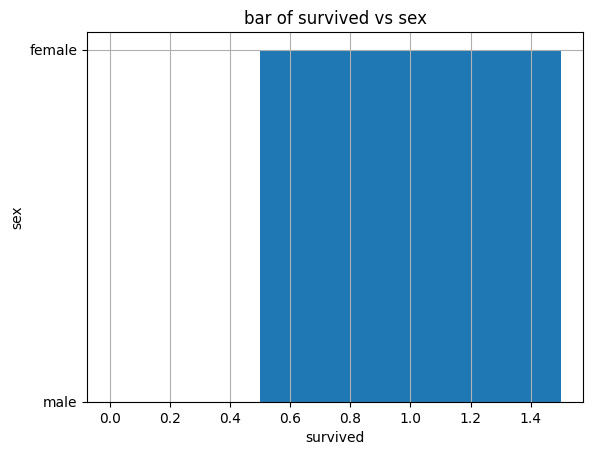

In [ ]:
#bar chart
variable_name = generate_plot(titanic, recommendation[0])
#bar chart
variable_name = generate_plot(titanic, recommendation[0], x_col='x', y_col='y')


#parallel plot
variable_name = generate_plot(titanic, recommendation[1])
#scatter plot
variable_name = generate_plot(titanic, recommendation[2])

<Axes: xlabel='survived', ylabel='pclass'>

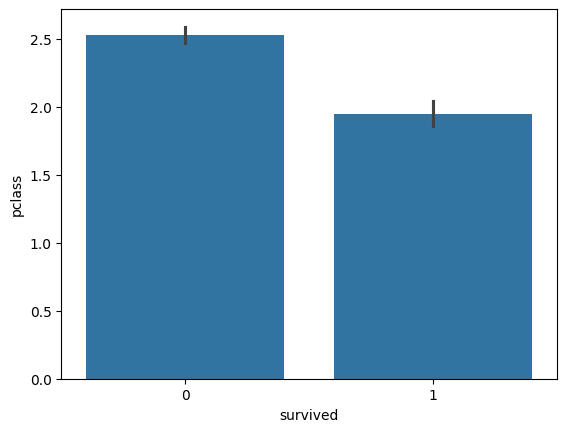

In [ ]:
# fig, ax = plt.subplots()
# sns.barplot(data=titanic, x='survived', y='pclass', ax=ax)

In [ ]:
explanation = refine_plot_explanation(plot_1)
print("Generated Explanation:")
print(explanation)

Generated Explanation:
## Improved Explanation

The provided bar graph illustrates the relationship between survival status and passenger class (pclass) in a dataset, likely from the Titanic. The x-axis is labeled "survived," with categories 0 and 1 representing individuals who did not survive and those who survived, respectively. The y-axis represents the passenger class (pclass).

### Interpretation

* **Passenger Class Representation:** The height of each bar corresponds to the average passenger class of individuals who did not survive (0) and those who survived (1). 
* **Survival and Passenger Class:** 
 * The bar for "0" (did not survive) extends higher on the y-axis, indicating that, on average, those who did not survive were of a higher passenger class compared to those who survived. Specifically, the average passenger class for non-survivors is approximately 2.5, while for survivors, it is around 2.0.
 * This suggests that higher passenger classes had lower survival rates. In o